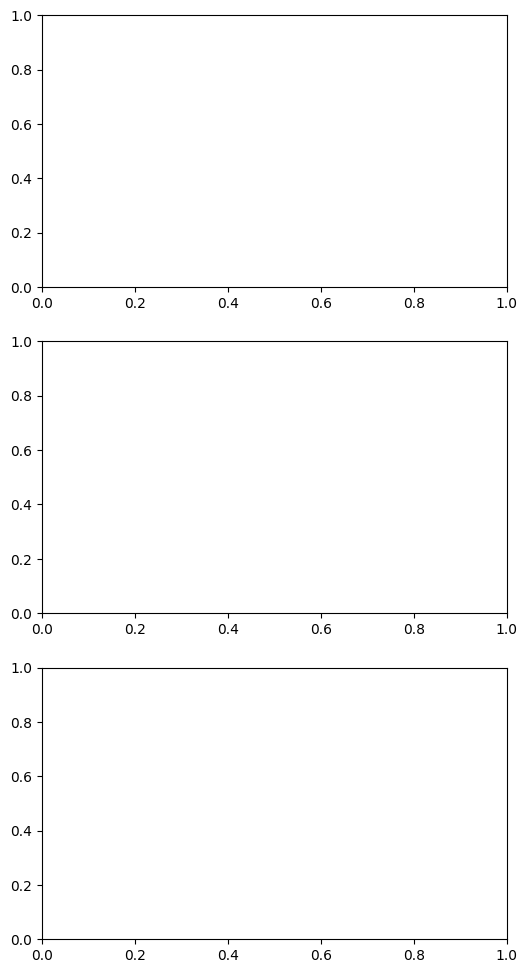

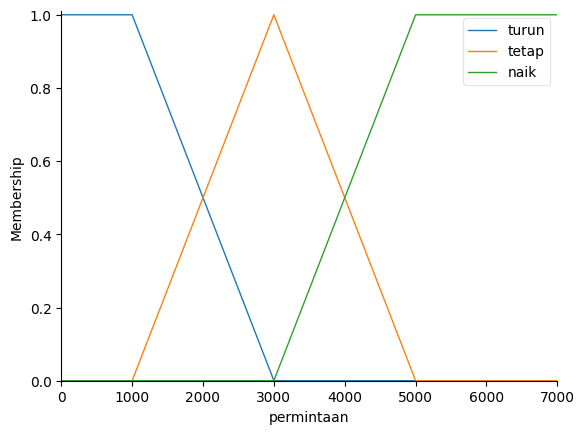

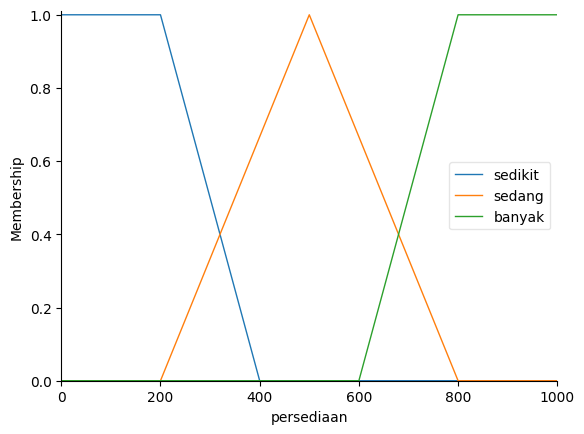

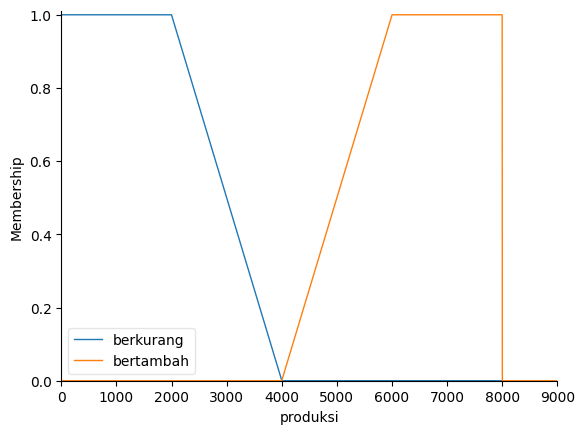

Produksi yang dihasilkan: 6162.03


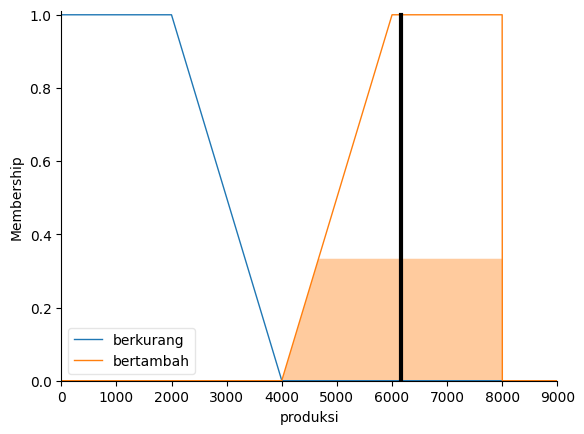

In [3]:
%matplotlib inline
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Variabel Input: Permintaan dan Persediaan
permintaan = ctrl.Antecedent(np.arange(0, 7001, 1), 'permintaan')
persediaan = ctrl.Antecedent(np.arange(0, 1001, 1), 'persediaan')

# Variabel Output: Produksi
produksi = ctrl.Consequent(np.arange(0, 9001, 1), 'produksi')

# Fungsi Keanggotaan untuk Permintaan
permintaan['turun'] = fuzz.trapmf(permintaan.universe, [0, 0, 1000, 3000])
permintaan['tetap'] = fuzz.trimf(permintaan.universe, [1000, 3000, 5000])
permintaan['naik'] = fuzz.trapmf(permintaan.universe, [3000, 5000, 7000, 7000])

# Fungsi Keanggotaan untuk Persediaan
persediaan['sedikit'] = fuzz.trapmf(persediaan.universe, [0, 0, 200, 400])
persediaan['sedang'] = fuzz.trimf(persediaan.universe, [200, 500, 800])
persediaan['banyak'] = fuzz.trapmf(persediaan.universe, [600, 800, 1000, 1000])

# Fungsi Keanggotaan untuk Produksi
produksi['berkurang'] = fuzz.trapmf(produksi.universe, [0, 0, 2000, 4000])
produksi['bertambah'] = fuzz.trapmf(produksi.universe, [4000, 6000, 8000, 8000])

# Visualisasi Fungsi Keanggotaan (Opsional)
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(6, 12))
permintaan.view(ax=ax1)
persediaan.view(ax=ax2)
produksi.view(ax=ax3)
plt.show()

# Aturan Fuzzy
rule1 = ctrl.Rule(permintaan['turun'] & persediaan['sedikit'], produksi['bertambah'])
rule2 = ctrl.Rule(permintaan['turun'] & persediaan['banyak'], produksi['berkurang'])
rule3 = ctrl.Rule(permintaan['naik'] & persediaan['sedikit'], produksi['bertambah'])
rule4 = ctrl.Rule(permintaan['naik'] & persediaan['banyak'], produksi['berkurang'])
rule5 = ctrl.Rule(permintaan['tetap'] & persediaan['sedang'], produksi['bertambah'])

# Sistem Kontrol Fuzzy
produksi_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
produksi_simulasi = ctrl.ControlSystemSimulation(produksi_ctrl)

# Input Nilai Permintaan dan Persediaan
permintaan_input = 3500  # Contoh input permintaan
persediaan_input = 300   # Contoh input persediaan

produksi_simulasi.input['permintaan'] = permintaan_input
produksi_simulasi.input['persediaan'] = persediaan_input

# Perhitungan Output
produksi_simulasi.compute()
print(f"Produksi yang dihasilkan: {produksi_simulasi.output['produksi']:.2f}")

# Visualisasi Hasil
produksi.view(sim=produksi_simulasi)
plt.show()


Produksi yang dihasilkan: 4429.32


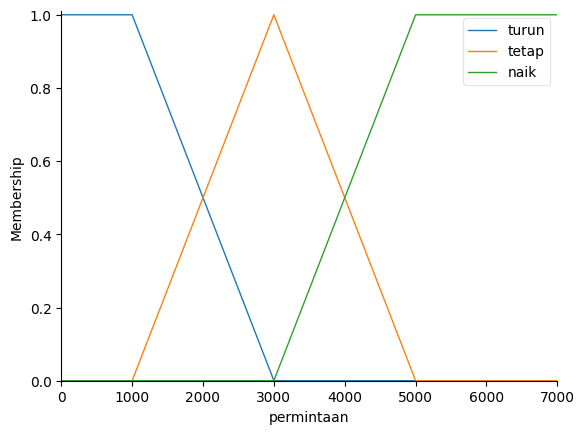

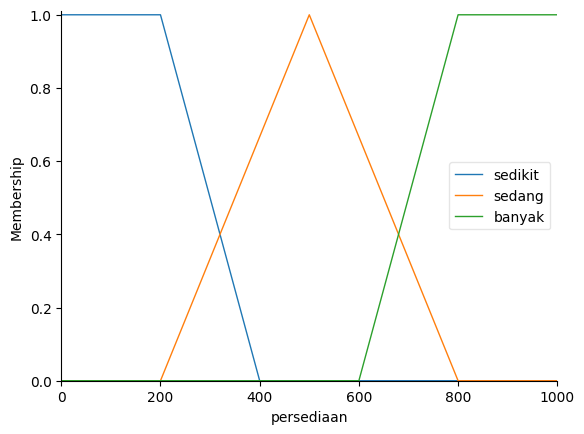

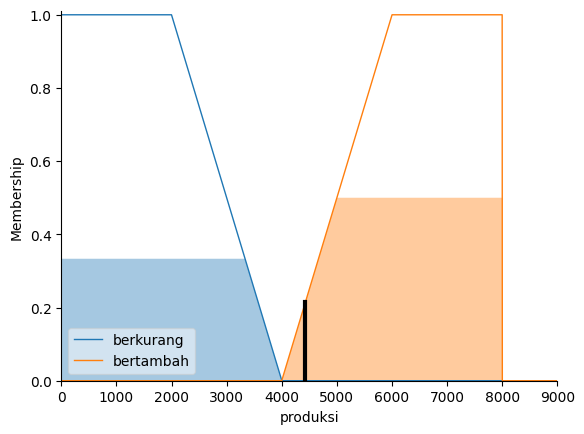

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Variabel Input dan Output
permintaan = ctrl.Antecedent(np.arange(0, 7001, 1), 'permintaan')
persediaan = ctrl.Antecedent(np.arange(0, 1001, 1), 'persediaan')
produksi = ctrl.Consequent(np.arange(0, 9001, 1), 'produksi')

# Fungsi Keanggotaan untuk Permintaan
permintaan['turun'] = fuzz.trapmf(permintaan.universe, [0, 0, 1000, 3000])
permintaan['tetap'] = fuzz.trimf(permintaan.universe, [1000, 3000, 5000])
permintaan['naik'] = fuzz.trapmf(permintaan.universe, [3000, 5000, 7000, 7000])

# Fungsi Keanggotaan untuk Persediaan
persediaan['sedikit'] = fuzz.trapmf(persediaan.universe, [0, 0, 200, 400])
persediaan['sedang'] = fuzz.trimf(persediaan.universe, [200, 500, 800])
persediaan['banyak'] = fuzz.trapmf(persediaan.universe, [600, 800, 1000, 1000])

# Fungsi Keanggotaan untuk Produksi
produksi['berkurang'] = fuzz.trapmf(produksi.universe, [0, 0, 2000, 4000])
produksi['bertambah'] = fuzz.trapmf(produksi.universe, [4000, 6000, 8000, 8000])

# Aturan Fuzzy
rule1 = ctrl.Rule(permintaan['turun'] & persediaan['sedikit'], produksi['bertambah'])
rule2 = ctrl.Rule(permintaan['turun'] & persediaan['sedang'], produksi['berkurang'])
rule3 = ctrl.Rule(permintaan['turun'] & persediaan['banyak'], produksi['berkurang'])
rule4 = ctrl.Rule(permintaan['tetap'] & persediaan['sedikit'], produksi['bertambah'])
rule5 = ctrl.Rule(permintaan['tetap'] & persediaan['sedang'], produksi['berkurang'])
rule6 = ctrl.Rule(permintaan['tetap'] & persediaan['banyak'], produksi['berkurang'])
rule7 = ctrl.Rule(permintaan['naik'] & persediaan['sedikit'], produksi['bertambah'])
rule8 = ctrl.Rule(permintaan['naik'] & persediaan['sedang'], produksi['bertambah'])
rule9 = ctrl.Rule(permintaan['naik'] & persediaan['banyak'], produksi['berkurang'])

# Sistem Kontrol Fuzzy
produksi_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
produksi_simulasi = ctrl.ControlSystemSimulation(produksi_ctrl)

# Input Nilai Permintaan dan Persediaan
permintaan_input = 3500  # Contoh input permintaan
persediaan_input = 300   # Contoh input persediaan

produksi_simulasi.input['permintaan'] = permintaan_input
produksi_simulasi.input['persediaan'] = persediaan_input

# Perhitungan Output
produksi_simulasi.compute()
print(f"Produksi yang dihasilkan: {produksi_simulasi.output['produksi']:.2f}")

# Visualisasi Hasil
permintaan.view()
persediaan.view()
produksi.view(sim=produksi_simulasi)
plt.show()
